In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


In [2]:
df=pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [5]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.shape

(200, 4)

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


TV              AxesSubplot(0.125,0.71587;0.168478x0.16413)
Radio        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Newspaper    AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Sales        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
dtype: object

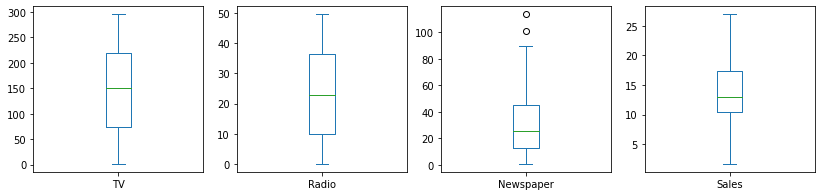

In [10]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(14, 14))


In [11]:
from scipy import stats
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [12]:
Q1 = df.quantile(0.25) 
Q3 = df.quantile(0.75) 
IQR = Q3 - Q1 
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

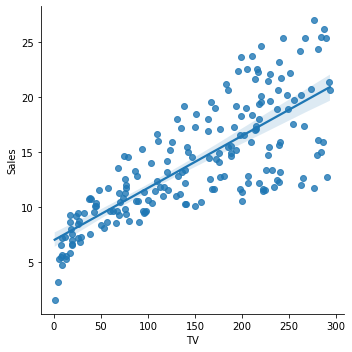

In [59]:
import seaborn as sns
sns.lmplot(x='TV', y='Sales', data=df)

there is a linear relationship 

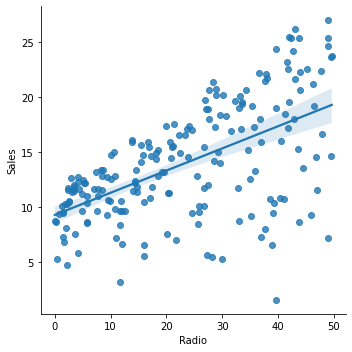

In [60]:
import seaborn as sns
sns.lmplot(x='Radio', y='Sales', data=df)

there is a no linear realtionship 

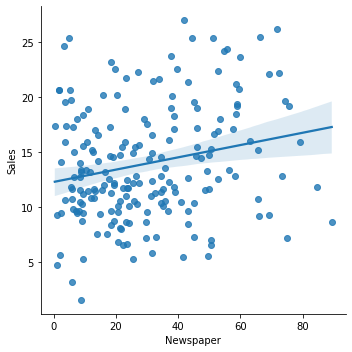

In [61]:
import seaborn as sns
sns.lmplot(x='Newspaper', y='Sales', data=df)

In [38]:
df.corr()['Sales']

TV           0.779121
Radio        0.576748
Newspaper    0.219555
Sales        1.000000
Name: Sales, dtype: float64

there is a   linear realtionship 

In [30]:
df.keys()

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [32]:
x=df[['TV', 'Radio', 'Newspaper']]
y=df['Sales']


In [33]:
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 0)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(158, 3)
(40, 3)
(158,)
(40,)


In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [40]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [41]:
model.fit(X_train,y_train)

LinearRegression()

In [42]:
# constant (b - bias)
model.intercept_

# coefficients (w - weights)
model.coef_

array([3.87028566, 2.82845228, 0.12742338])

In [43]:
y_pred=model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(rmse)
r2_score=r2_score(y_test,y_pred)
print(r2_score*100)

1.5595116807736769
90.9894635900056


In [48]:
print(y_pred)

[14.01074388  7.32660883 16.91029923 12.10494494 10.32680801 15.800589
 12.86917345 14.46182171 10.88622651 16.12070585 22.89188978  4.44772138
 14.47452338 15.16779294 13.08219004 11.93756336  7.38163825 11.34017618
  9.97074394 17.25257133 20.92597453  9.48506413  8.89608111 12.37384205
  9.35819552 16.12716079 12.20096627 20.59655504 21.36951517 15.07208869
 23.2153892  20.87809592  9.72208672 24.06696712 16.36688684  7.97869287
 21.91262979 13.29393385 11.82322424  9.07954633]


In [56]:
act_predict= pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predict': y_pred.flatten()})
act_predict.head(5)

,Actual,Predict
0,14.6,14.010744
1,8.4,7.326609
2,18.0,16.910299
3,11.7,12.104945
4,8.8,10.326808


<AxesSubplot:>

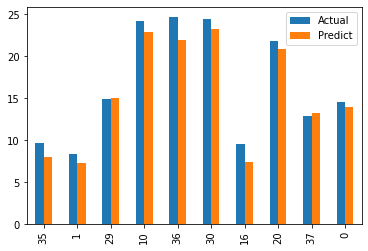

In [57]:
act_predict.sample(10).plot(kind='bar')

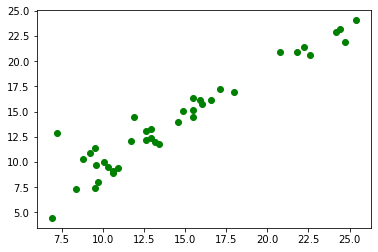

In [67]:
plt.scatter(y_test,y_pred,c='g')

In [69]:
# Calculate the R-squared value for the train data
train_score = model.score(X_train, y_train)

# Calculate the R-squared value for the test data
test_score = model.score(X_test, y_test)

# Print the R-squared values for both the train and test data
print("R-squared value for train data:", train_score*100)
print("R-squared value for test data:", test_score*100)

R-squared value for train data: 88.98322019518987
R-squared value for test data: 90.9894635900056
